In [61]:
import pandas as pd
import datetime as dt
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pprint import pprint
import numpy as np

In [76]:
file = "P:/prevodem.csv"
data = pd.read_csv(file, sep=',', nrows=10,
                  names=["Id", "ID_faktury", "PSC", "Country", "Nace_Kod", "Nace_name", "Datum_Vystaveni", "Datum_Splatnosti", "Datum_uhrady", "Rozdil", "Splatnost", "DateCreated", "Parovani", "Typ_uhrady", "Typ_uhrady_Real"],
                  parse_dates=["Datum_Vystaveni", "Datum_Splatnosti", "Datum_uhrady", "DateCreated"])

In [77]:
data = data.drop(columns=["Id", "ID_faktury", "PSC", "Country", "Nace_Kod", "Nace_name", "Datum_Splatnosti", "Datum_uhrady", "DateCreated", "Parovani"])

In [78]:
data.drop([0], inplace=True)

In [94]:
data["D_Vystaveni"] = [dt.datetime.strptime(d, "%Y-%m-%d") for d in data["Datum_Vystaveni"]]

In [95]:
print(type(data.loc[1, "D_Vystaveni"]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [96]:
data.groupby(data["D_Vystaveni"].dt.strftime('%Y-%m'))['Rozdil'].mean()

D_Vystaveni
2011-01    1.888889
Name: Rozdil, dtype: float64

In [97]:
pt = data.pivot_table(index=["D_Vystaveni"], columns="SubscriptionType", aggfunc=np.mean)

KeyError: 'SubscriptionType'

In [39]:
pt.drop(columns=["Splatnost"], inplace=True)

In [40]:
print(pt)

                    Rozdil                               
SubscriptionType         0         1          2         3
Datum_Vystaveni                                          
2011-01-11             NaN       NaN   0.000000       NaN
2011-01-13             NaN  0.000000        NaN       NaN
2011-01-20             NaN       NaN   0.000000       NaN
2011-01-26             NaN       NaN   0.000000       NaN
2011-02-01             NaN       NaN   0.000000       NaN
...                    ...       ...        ...       ...
2017-08-03        0.300000  1.829268   4.241071  1.212121
2017-08-04        2.448276  0.950820   1.871795  1.303030
2017-08-05       -0.250000  2.657143   2.982759  0.111111
2017-08-06        4.166667  0.058824   3.800000  0.000000
2017-08-25             NaN       NaN  21.000000       NaN

[700 rows x 4 columns]


In [41]:
pt.columns = pt.columns.droplevel()

In [42]:
print(pt)

SubscriptionType         0         1          2         3
Datum_Vystaveni                                          
2011-01-11             NaN       NaN   0.000000       NaN
2011-01-13             NaN  0.000000        NaN       NaN
2011-01-20             NaN       NaN   0.000000       NaN
2011-01-26             NaN       NaN   0.000000       NaN
2011-02-01             NaN       NaN   0.000000       NaN
...                    ...       ...        ...       ...
2017-08-03        0.300000  1.829268   4.241071  1.212121
2017-08-04        2.448276  0.950820   1.871795  1.303030
2017-08-05       -0.250000  2.657143   2.982759  0.111111
2017-08-06        4.166667  0.058824   3.800000  0.000000
2017-08-25             NaN       NaN  21.000000       NaN

[700 rows x 4 columns]


In [48]:
pt = pt['2017-06':]

In [55]:
pt.info

<bound method DataFrame.info of SubscriptionType          0          1          2         3
Datum_Vystaveni                                            
2017-06-01        -2.571429  -8.500000 -12.125000  2.298611
2017-06-02        20.500000 -10.200000 -14.000000  0.997996
2017-06-03              NaN -11.000000  -7.000000  1.531646
2017-06-04        -2.500000  -7.666667  -5.600000  2.490775
2017-06-05        -5.000000 -12.666667  10.000000  1.192763
...                     ...        ...        ...       ...
2017-08-03         0.300000   1.829268   4.241071  1.212121
2017-08-04         2.448276   0.950820   1.871795  1.303030
2017-08-05        -0.250000   2.657143   2.982759  0.111111
2017-08-06         4.166667   0.058824   3.800000  0.000000
2017-08-25              NaN        NaN  21.000000       NaN

[68 rows x 4 columns]>

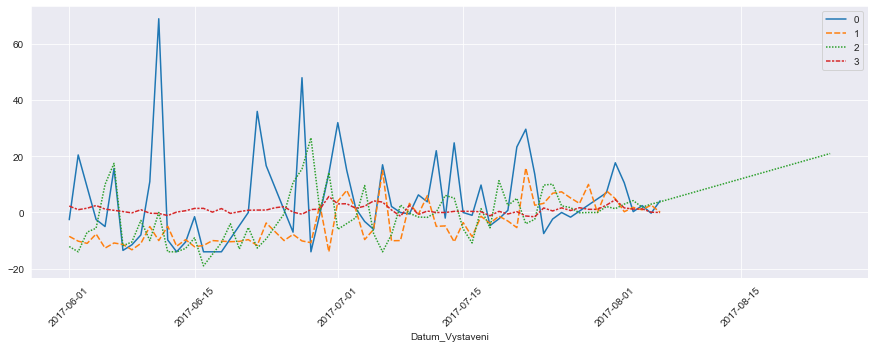

In [60]:
#fig, ax = plt.subplots()
#ax.set_xlim('2017-06-01', '2017-08-25')
#sns.scatterplot(x=pt.index, y=pt[0])
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
plt.xticks(rotation=45)
sns.lineplot(data = pt)